<a href="https://colab.research.google.com/github/CharWangkor27/ML_Project/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required library


In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import required library


In [149]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [150]:
X= np.load("../content/drive/MyDrive/Colab Notebooks/Sign-Language-Digits-Data/X.npy")
Y = np.load("../content/drive/MyDrive/Colab Notebooks/Sign-Language-Digits-Data/Y.npy")

In [151]:
X.shape

(2062, 64, 64)

In [152]:
Y.shape

(2062, 10)

In [153]:
y = np.argmax(Y, axis=1)
y.shape

(2062,)

In [154]:

def show_images(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

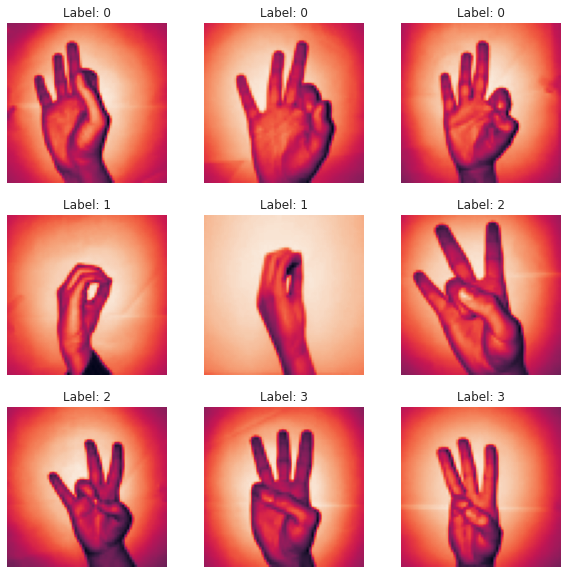

In [155]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    show_images(X[i * 100], label="Label: " + str(y[i * 100]))

#process and split data


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [157]:
inputs = tf.keras.Input(shape=(64, 64, 1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)



outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())




Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d_10 (Avera  (None, 30, 30, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_11 (Avera  (None, 13, 13, 16)       0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0   

In [158]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
42/42 [==============================] - 3s 66ms/step - loss: 2.2394 - accuracy: 0.2092 - val_loss: 1.9545 - val_accuracy: 0.3697
Epoch 2/100
42/42 [==============================] - 3s 62ms/step - loss: 1.5223 - accuracy: 0.5072 - val_loss: 1.0076 - val_accuracy: 0.6909
Epoch 3/100
42/42 [==============================] - 3s 62ms/step - loss: 0.8472 - accuracy: 0.7324 - val_loss: 0.6873 - val_accuracy: 0.7909
Epoch 4/100
42/42 [==============================] - 3s 62ms/step - loss: 0.5531 - accuracy: 0.8241 - val_loss: 0.5230 - val_accuracy: 0.8424
Epoch 5/100
42/42 [==============================] - 3s 62ms/step - loss: 0.4042 - accuracy: 0.8779 - val_loss: 0.4856 - val_accuracy: 0.8273
Epoch 6/100
42/42 [==============================] - 3s 62ms/step - loss: 0.3299 - accuracy: 0.8901 - val_loss: 0.4355 - val_accuracy: 0.8455
Epoch 7/100
42/42 [==============================] - 3s 61ms/step - loss: 0.2376 - accuracy: 0.9196 - val_loss: 0.3769 - val_accuracy: 0.8818
Epoch 

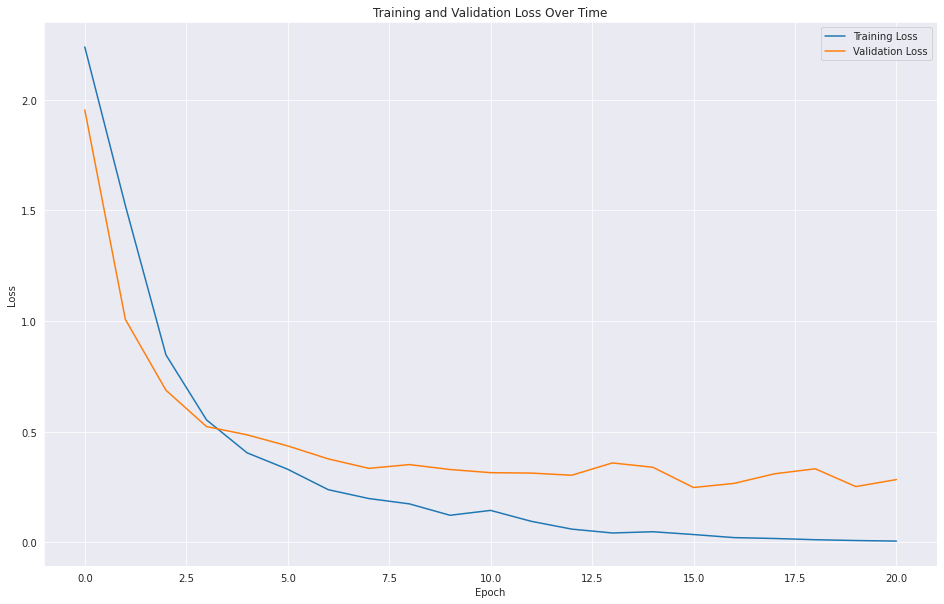

In [159]:
plt.figure(figsize=(16, 10))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

In [160]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

13/13 [==============================] - 0s 23ms/step
Test Loss: 0.61899
Test Accuracy: 86.92%


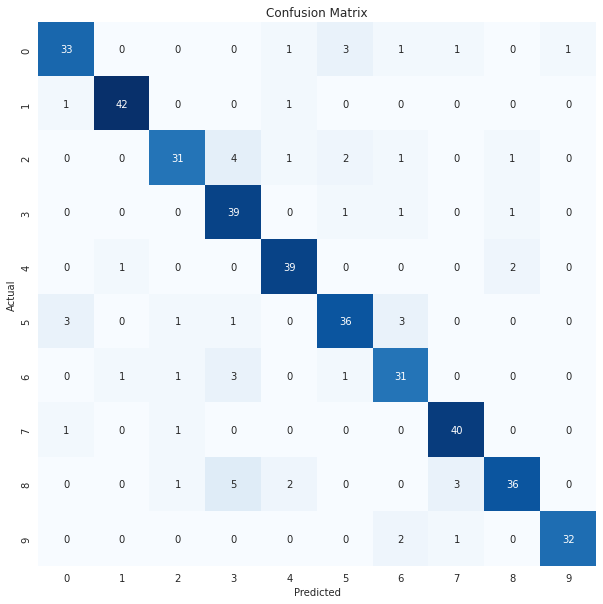

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.95      0.95      0.95        44
           2       0.89      0.78      0.83        40
           3       0.75      0.93      0.83        42
           4       0.89      0.93      0.91        42
           5       0.84      0.82      0.83        44
           6       0.79      0.84      0.82        37
           7       0.89      0.95      0.92        42
           8       0.90      0.77      0.83        47
           9       0.97      0.91      0.94        35

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.87      0.87      0.87       413



In [161]:
evaluate_model(model, X_test, y_test)